<a href="https://colab.research.google.com/github/dogmatix76/PGPDS_Projects_Assignments/blob/master/gv_Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep learning model for the diabetes dataset**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r'/content/drive/My Drive/Datasets/diabetes.csv')

In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.Outcome.unique()

array([1, 0])

As we see above this dataset has a binary outcome label 1 or 0

In [9]:
# Check if there are any null values
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


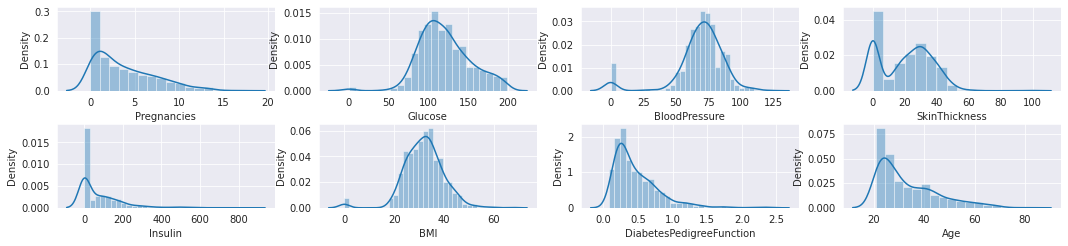

In [10]:
plt.figure(figsize=(18,8))
plt.subplots_adjust(hspace = .4, wspace = .2)

for i, col in enumerate (data.columns[:-1]):
  plt.subplot(4,4,i+1)
  sns.distplot(data[col])

plt.xlabel(col)
plt.show()

In [11]:
for col in data.columns [:-1] :
  zerocount = len (data [col] [data [col] == 0])
  print ('for col = {}, no. of zeros = {}'. format (col, zerocount))

for col = Pregnancies, no. of zeros = 111
for col = Glucose, no. of zeros = 5
for col = BloodPressure, no. of zeros = 35
for col = SkinThickness, no. of zeros = 227
for col = Insulin, no. of zeros = 374
for col = BMI, no. of zeros = 11
for col = DiabetesPedigreeFunction, no. of zeros = 0
for col = Age, no. of zeros = 0


We notice that there are zero values in many features that will impact the model trainig. We can replace these with median

In [12]:
features = data.drop(columns=['Outcome']).values
label = data.Outcome.values

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(features == '0', strategy='median')
features_nonzero = imputer.fit_transform(data.drop(columns='Outcome'))
features_nonzero = pd.DataFrame(features_nonzero, columns=data.columns[:-1])

In [14]:
features_nonzero.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0


In [15]:
data1 = pd.concat([features_nonzero, data.Outcome], axis = 1)

In [16]:
for col in data1.columns [:-1]:
  print ('Zero values in col {} = {}'.format (col, (data1[col]==0).any()))

Zero values in col Pregnancies = False
Zero values in col Glucose = False
Zero values in col BloodPressure = False
Zero values in col SkinThickness = False
Zero values in col Insulin = False
Zero values in col BMI = False
Zero values in col DiabetesPedigreeFunction = False
Zero values in col Age = False


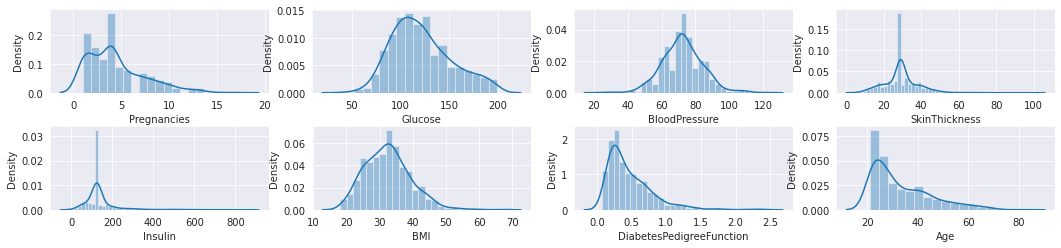

In [18]:
plt.figure(figsize=(18,8))
plt.subplots_adjust(hspace = .4, wspace = .2)

for i, col in enumerate (data1.columns[:-1]):
  plt.subplot(4,4,i+1)
  sns.distplot(data1[col])

plt.xlabel(col)
plt.show()

In [19]:
for col in data1.columns [:-1] :
  zerocount = len (data1 [col] [data1 [col] == 0])
  print ('for col = {}, no. of zeros = {}'. format (col, zerocount))

for col = Pregnancies, no. of zeros = 0
for col = Glucose, no. of zeros = 0
for col = BloodPressure, no. of zeros = 0
for col = SkinThickness, no. of zeros = 0
for col = Insulin, no. of zeros = 0
for col = BMI, no. of zeros = 0
for col = DiabetesPedigreeFunction, no. of zeros = 0
for col = Age, no. of zeros = 0


As we observe above the '0' values have been successfully replaced with median

In [20]:
# Alternate way of handling zeros
#for i, col in enumerate (data.columns [:-1]) :
# if (data [col] == 0).any () :
# index = data [col] [data [col] == 0].index
# data.loc [index, col] = data [col] [data [col] != 0].median ()

In [21]:
#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_norm = sc.fit_transform(features_nonzero)
features_norm = pd.DataFrame(features_norm, columns=data.columns[:-1])

In [24]:
data_norm = pd.concat([features_norm, data.Outcome], axis = 1)
#features1 = data_norm.drop(columns=['Outcome']).values
#label1 = data_norm.Outcome.values

In [25]:
# check correlations
data_norm.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.153525,0.255967,0.126082,0.032397,0.100870,-0.009198,0.522303,0.248172
Glucose,0.153525,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.255967,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.126082,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.032397,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.100870,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.009198,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.522303,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.248172,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


We notice that BMI and Glucose are the most highly correlated variables to the outcome

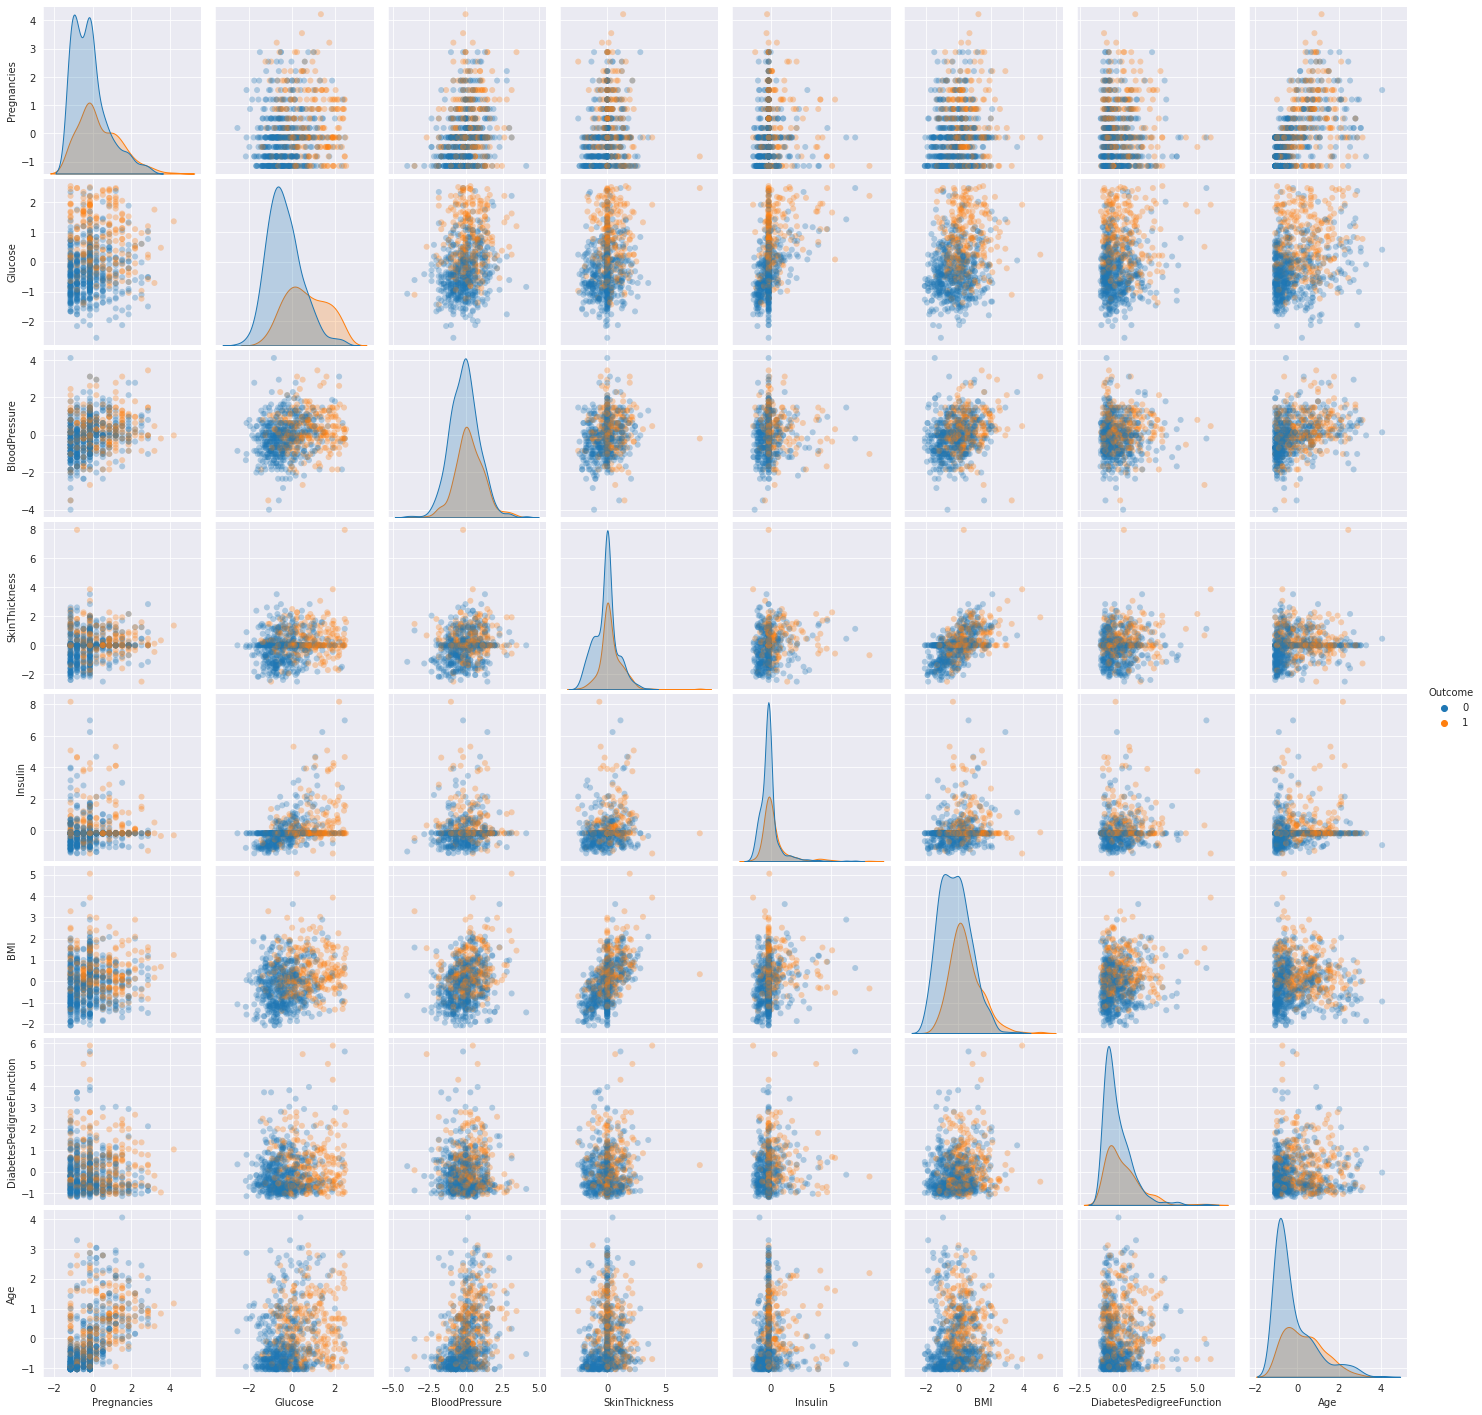

In [26]:
sns.pairplot(data_norm, hue = 'Outcome', plot_kws=dict(alpha=.3,edgecolor='none'))

**Model Building**

In [27]:
# Splitting the dataset
X = data_norm.drop('Outcome', axis = 1)
y = data_norm['Outcome']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 4)

In [29]:
# Using Random Forests
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
rfc_model = rfc.predict(X_test)

In [31]:
print ('rfc_model accuracy = ', format(metrics.accuracy_score(y_test,rfc_model)))

rfc_model accuracy =  0.7662337662337663


In [32]:
# Using XGBoost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma = 0)
xgb_model.fit (X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [33]:
xgb_pred = xgb_model.predict(X_test)

In [34]:
print ('xgb_model accuracy = ', format(metrics.accuracy_score(y_test,xgb_pred)))

xgb_model accuracy =  0.7922077922077922


In [35]:
print (confusion_matrix(y_test, xgb_pred))
print (classification_report(y_test, xgb_pred))

[[85 17]
 [15 37]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       102
           1       0.69      0.71      0.70        52

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



In [36]:
# Using SVM

from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
svc_predict = svc_model.predict(X_test)

In [38]:
print ('svc_model accuracy = ', format(metrics.accuracy_score(y_test,svc_predict)))

svc_model accuracy =  0.7662337662337663


Using ML methods we get the highest accuracy using XGBoost Classifier

Using DNN Classifier - Tensorflow

In [39]:
# Architecht the neural network

tf_model = tf.keras.models.Sequential()

# as per guidelines 
tf_model.add(tf.keras.layers.Dense(units= 7, activation='relu', input_shape=(8,)))
tf_model.add(tf.keras.layers.Dense(units = 7, activation='relu'))
tf_model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [40]:
# Compile Neural network
tf_model.compile(optimizer = "Adam",
              loss = "binary_crossentropy",
              metrics=['accuracy'])

In [41]:
# Fit the DNN model

X_train, X_test, y_train, y_test = train_test_split(features_norm, label, test_size=0.2, random_state = 4)

In [46]:
tf_model.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3683 - accuracy: 0.8322 - val_loss: 0.5141 - val_accuracy: 0.7597
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.8290 - val_loss: 0.5133 - val_accuracy: 0.7597
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3676 - accuracy: 0.8322 - val_loss: 0.5130 - val_accuracy: 0.7597
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3677 - accuracy: 0.8290 - val_loss: 0.5121 - val_accuracy: 0.7597
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy: 0.8290 - val_loss: 0.5155 - val_accuracy: 0.7532
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.8290 - val_loss: 0.5171 - val_accuracy: 0.7597
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8306 - val_loss: 0.5151 - val_accuracy: 0.7532
Epoch 8/100
2